In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = df.iloc[:, 3:5]

In [5]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
SpeciesToNum = { 'Iris-setosa': 0, 'Iris-versicolor':1, 'Iris-virginica':2}

In [7]:
df['SpeciesToNum'] = df['Species'].map(SpeciesToNum)

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SpeciesToNum
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [9]:
X = np.array(X)
y = np.array(df['SpeciesToNum'])

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
from sklearn import svm

In [12]:
clf = svm.SVC( kernel= 'poly', C = 1, degree = 3)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state =0)

In [39]:
Scaler = StandardScaler()

In [40]:
X_std_train = Scaler.fit_transform(X_train)

In [15]:
clf.fit(X_train, y_train)

SVC(C=1, kernel='poly')

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [18]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [19]:
res = cross_val_score( clf, X_train, y_train, cv = 10, scoring = 'accuracy')

In [20]:
res.mean()

np.float64(0.9371212121212119)

In [21]:
y_train_pred = cross_val_predict( clf, X_train, y_train, method = 'predict')

In [22]:
confusion_matrix(y_train, y_train_pred)

array([[37,  0,  0],
       [ 0, 31,  3],
       [ 0,  2, 39]])

In [23]:
precision = precision_score(y_train, y_train_pred, average = None)

In [24]:
precision

array([1.        , 0.93939394, 0.92857143])

In [26]:
h = 0.02
X0max = X[:,0].max()
X0min = X[:,0].min()

In [27]:
X0max, X0min

(np.float64(6.9), np.float64(1.0))

In [28]:
X1max = X[:,1].max()
X1min = X[:,1].min()

In [29]:
X1max, X1min

(np.float64(2.5), np.float64(0.1))

In [30]:
X = df.iloc[:, 3:5]
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [31]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

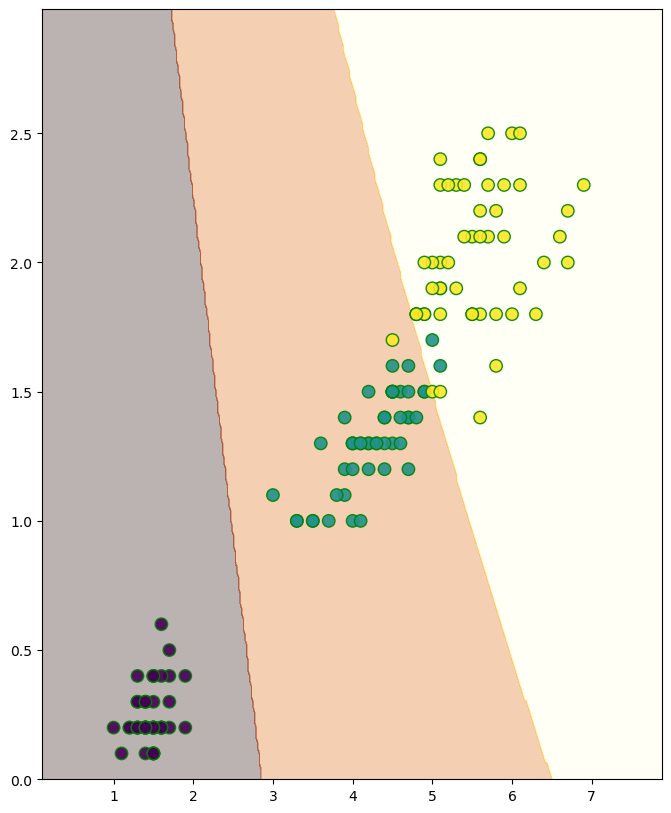

In [33]:
fig = plt.figure(figsize=(8,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80,
            alpha=0.9, edgecolors='g');

In [34]:
from sklearn.pipeline import Pipeline

In [35]:
from sklearn.model_selection import GridSearchCV

In [62]:
pipeline = Pipeline([('clf', svm.SVC(kernel = 'rbf', C=1, gamma=0.1))])
params = {'clf__C':(0.1, 0.5, 1,2,3,5,10,15,20), 'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.51, 0.75, 1)}

In [63]:
svm_rbf_gridsearch = GridSearchCV(pipeline, params, n_jobs=1, cv=3, verbose=1, scoring = 'accuracy')

In [65]:
svm_rbf_gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 63 candidates, totalling 189 fits


GridSearchCV(cv=3, estimator=Pipeline(steps=[('clf', SVC(C=1, gamma=0.1))]),
             n_jobs=1,
             param_grid={'clf__C': (0.1, 0.5, 1, 2, 3, 5, 10, 15, 20),
                         'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.51, 0.75, 1)},
             scoring='accuracy', verbose=1)

In [66]:
a=3

In [67]:
svm_rbf_gridsearch.best_score_

np.float64(0.9644381223328592)

In [68]:
svm_rbf_gridsearch.best_estimator_.get_params()

{'memory': None,
 'steps': [('clf', SVC(C=0.5, gamma=0.51))],
 'transform_input': None,
 'verbose': False,
 'clf': SVC(C=0.5, gamma=0.51),
 'clf__C': 0.5,
 'clf__break_ties': False,
 'clf__cache_size': 200,
 'clf__class_weight': None,
 'clf__coef0': 0.0,
 'clf__decision_function_shape': 'ovr',
 'clf__degree': 3,
 'clf__gamma': 0.51,
 'clf__kernel': 'rbf',
 'clf__max_iter': -1,
 'clf__probability': False,
 'clf__random_state': None,
 'clf__shrinking': True,
 'clf__tol': 0.001,
 'clf__verbose': False}

In [70]:
y_test_pred= svm_rbf_gridsearch.predict(X_test)

In [71]:
confusion_matrix(y_test, y_test_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [72]:
y_test_clf_pred = clf.predict(X_test)

In [73]:
confusion_matrix(y_test_clf_pred, y_test)

array([[13,  0,  0],
       [ 0, 15,  0],
       [ 0,  1,  9]])